In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


population = pd.read_csv('population1.csv', sep = ",")
surface = pd.read_csv('EuropeSuperficie2.csv', sep = ",")

surface = surface.rename(columns={"États_membres": "GEO"})

population = population.rename(columns={"Value": "nb_habitants"})

complet = surface.merge(population, left_on='GEO', right_on='GEO', how='outer')


complet = complet[complet.nb_habitants != ":"]

complet["nb_habitants"] = complet["nb_habitants"].astype(float)

complet["densite"] = complet["nb_habitants"]/complet["Superficie_(km2)"].values

complet.sort_values(by = 'densite', ascending = False).head(70)

,GEO,Superficie_(km2),TIME,AGE,SEX,UNIT,nb_habitants,Flag and Footnotes,densite
180,Malte,316.0,2017.0,Total,Total,Nombre,460297.0,NaN,1456.636076
179,Malte,316.0,2016.0,Total,Total,Nombre,450415.0,NaN,1425.363924
178,Malte,316.0,2015.0,Total,Total,Nombre,439691.0,NaN,1391.427215
177,Malte,316.0,2014.0,Total,Total,Nombre,429424.0,NaN,1358.936709
176,Malte,316.0,2013.0,Total,Total,Nombre,422509.0,NaN,1337.053797
175,Malte,316.0,2012.0,Total,Total,Nombre,417546.0,NaN,1321.348101
174,Malte,316.0,2011.0,Total,Total,Nombre,414989.0,NaN,1313.256329
173,Malte,316.0,2010.0,Total,Total,Nombre,414027.0,NaN,1310.212025
172,Malte,316.0,2009.0,Total,Total,Nombre,410926.0,NaN,1300.398734
171,Malte,316.0,2008.0,Total,Total,Nombre,407832.0,NaN,1290.607595


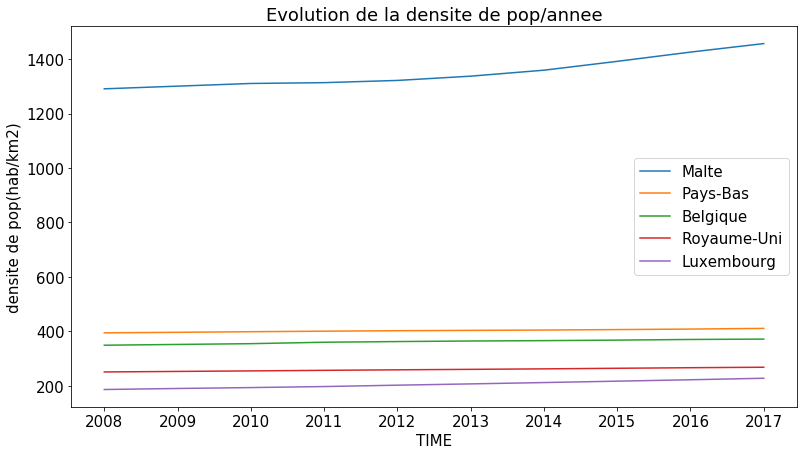

In [2]:
densite_pop_malte = complet.loc[complet.GEO == "Malte", ["TIME","densite"]].sort_values(by = 'TIME', ascending = True)
densite_pop_Pays_Bas = complet.loc[complet.GEO == "Pays-Bas", ["TIME","densite"]].sort_values(by = 'TIME', ascending = True)
densite_pop_Belgique = complet.loc[complet.GEO == "Belgique", ["TIME","densite"]].sort_values(by = 'TIME', ascending = True)
densite_pop_Royaume_Uni = complet.loc[complet.GEO == "Royaume-Uni", ["TIME","densite"]].sort_values(by = 'TIME', ascending = True)
densite_pop_Luxembourg = complet.loc[complet.GEO == "Luxembourg", ["TIME","densite"]].sort_values(by = 'TIME', ascending = True)

plt.figure(figsize=(13,7))
plt.rcParams['font.size'] = 15
plt.title('Evolution de la densite de pop/annee')
plt.ylabel('densite de pop(hab/km2)')
plt.xlabel('Année')
plt.xticks([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])

ax = plt.gca()


densite_pop_malte.plot(x='TIME', y='densite',ax=ax, label='Malte')
densite_pop_Pays_Bas.plot(x='TIME', y='densite',ax=ax, label='Pays-Bas')
densite_pop_Belgique.plot(x='TIME', y='densite',ax=ax, label='Belgique')
densite_pop_Royaume_Uni.plot(x='TIME', y='densite',ax=ax, label='Royaume-Uni')
densite_pop_Luxembourg.plot(x='TIME', y='densite',ax=ax, label='Luxembourg')

In [3]:
infraction = pd.read_csv('crimes.csv', sep = ",")

infraction = infraction[infraction.Value != ":"]

infraction["Value"] = infraction["Value"].astype(int)

matched = infraction.loc[infraction["TIME"] == 2007, :]
grouped = matched.groupby(['ICCS'])["Value"].sum()
grouped = grouped.drop("Total")

grouped = grouped.round(decimals=1)
grouped

ICCS
Actes portant atteinte ou visant à porter atteinte à la personne, actes préjudiciables à caractère sexuel et actes visant des biens avec violence ou menaces contre une personne    2955928
Cambriolage de locaux résidentiels privés                                                                                                                                           1586602
Homicide intentionnel                                                                                                                                                                 11079
Vol qualifié                                                                                                                                                                         700699
Name: Value, dtype: int32

Text(0.5, 1.0, "Repartition des types d'agression en 2007")

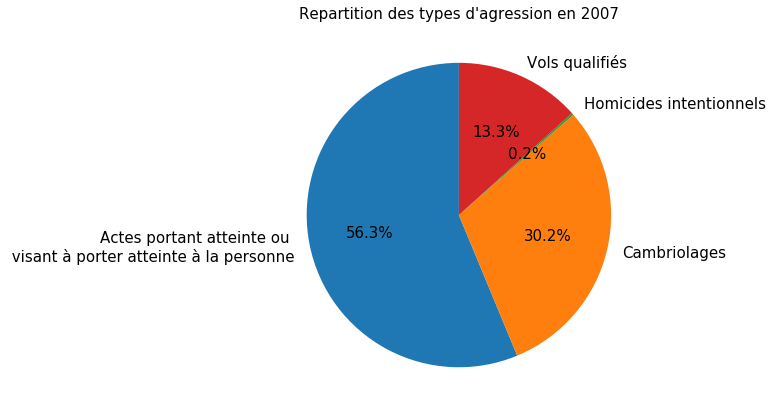

In [4]:
labels = 'Actes portant atteinte ou \n visant à porter atteinte à la personne', 'Cambriolages', 'Homicides intentionnels', 'Vols qualifiés'

plt.rcParams['font.size'] = 15

fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(grouped, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title("Repartition des types d'agression en 2007",fontsize=15)
 
# A memoriser : df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97], 'radius': [2439.7, 6051.8, 6378.1]}, index=['Mercury', 'Venus', 'Earth'])
# plot = df.plot.pie(y='mass', figsize=(5, 5)) et textprops= {'size': 'large'}

In [5]:
police = pd.read_csv('police.csv', sep = ",")
police = police[police.Value != ":"]
police["Value"] = police["Value"].astype(int)

infraction_T = infraction.loc[(infraction["GEO"] == "Turquie") & (infraction["ICCS"] == "Total"), ["TIME","Value"]]
police_Turquie = police.loc[police["GEO"] == "Turquie", ["TIME","Value"]]

police_Turquie.reset_index(inplace=True)
police_Turquie.drop('index', axis=1)

infraction_T.reset_index(inplace=True)
infraction_T.drop('index', axis=1)

complet1 = police_Turquie.merge(infraction_T, left_on='TIME', right_on='TIME', how='inner')

complet1 = complet1.rename(columns={"Value_x": "nombre de policiers"})
complet1 = complet1.rename(columns={"Value_y": "nombre d'infractions"})
complet1

,index_x,TIME,nombre de policiers,index_y,nombre d'infractions
0,35,1998,322766,190,357311
1,71,1999,345033,385,338606
2,107,2000,347806,580,337079
3,143,2001,368942,775,400337
4,179,2002,370095,970,438714
5,215,2003,318189,1165,472153
6,251,2004,327371,1360,507539
7,287,2005,330310,1555,667820
8,323,2006,325738,1750,975118
9,359,2007,329533,1945,970554


<Figure size 1440x504 with 0 Axes>

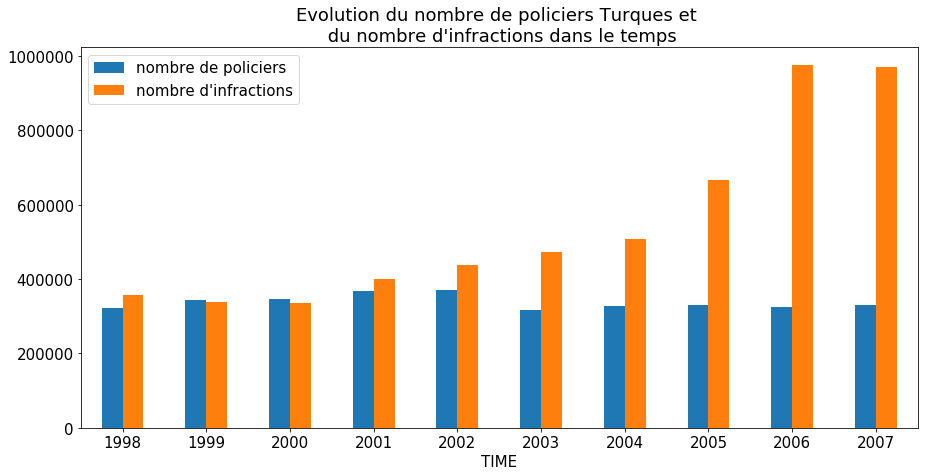

In [6]:
plt.figure(figsize=(20,7))

complet1.plot.bar(x="TIME",y=["nombre de policiers","nombre d'infractions"],rot=0, figsize=(15,7), title="Evolution du nombre de policiers Turques et \n du nombre d'infractions dans le temps")
plt.rcParams['font.size'] = 15

# pas d'interprétation possible j'ai utilisé les lignes "total" des infractions qui n'est pas égale 
# à la somme de toutes les infractions fournis dans le jeu de données.
#Sinon on remarque une forte augementation du nombre d'infractions à partir de 2015 
#alors que le nombre de policiers est stable au cours du temps. 

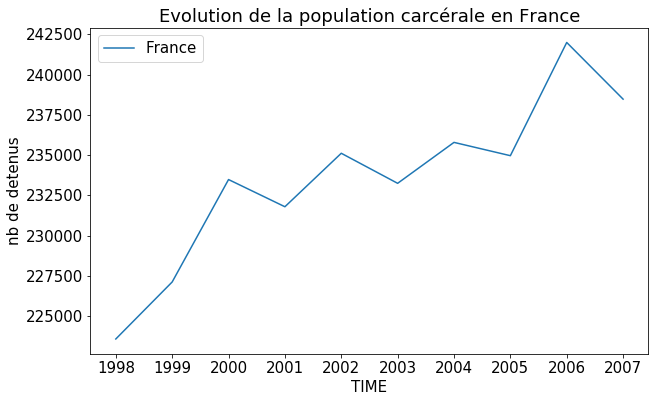

In [7]:
detenus = pd.read_csv('crim_pris.csv', sep = ",")
detenus = detenus[detenus.Value != ":"]
France = police.loc[police["GEO"] == "France",["Value","TIME"]]

plt.figure(figsize=(10,6))

plt.title('Evolution de la population carcérale en France')
plt.ylabel('nb de detenus')
plt.xlabel('Année')
plt.xticks([1998,1999,2000,2001,2002,2003,2004,2005,2006,2007])

ax = plt.gca()


France.plot(x='TIME', y='Value',ax=ax, label='France')


# 2 fortes augmentatations de la population carcérale en France. En 1999 et 2006.

In [11]:
policier_infraction = police.merge(infraction, left_on=['GEO',"TIME"], right_on=['GEO',"TIME"], how='outer') # inner join possible
policier_infraction = policier_infraction.drop(columns=['UNIT_x', 'Flag and Footnotes_x',"UNIT_y","Flag and Footnotes_y"])

policier_infraction = policier_infraction.dropna(axis=0)
policier_infraction = policier_infraction[(policier_infraction.ICCS == "Homicide intentionnel")]

policier_infraction = policier_infraction.rename(columns={"Value_x": "nombre de policiers"})
policier_infraction = policier_infraction.rename(columns={"Value_y": "nombre d'homicides"})

policier_infraction = policier_infraction.groupby(['TIME',"GEO"]).agg({"nombre d'homicides" : "sum", "nombre de policiers" : "max"})
#ligne de code non obligatoire je n'étais pas parti sur les homicides mais sur l'ensemble des infractions.


#policier_infraction = policier_infraction[policier_infraction["nombre de policiers"] != ":"]

#policier_infraction["nombre de policiers"] = policier_infraction["nombre de policiers"].astype(int)

policier_infraction = policier_infraction.reset_index()

policier_infraction_propre = policier_infraction

policier_infraction_propre.head(20)

,TIME,GEO,nombre d'homicides,nombre de policiers
0,1998,"Allemagne (jusqu'en 1990, ancien territoire de...",998.0,237786.0
1,1998,Autriche,77.0,26817.0
2,1998,Chypre,7.0,3987.0
3,1998,Croatie,131.0,22577.0
4,1998,Danemark,60.0,9962.0
5,1998,England et Wales,750.0,126814.0
6,1998,Estonie,196.0,4089.0
7,1998,Finlande,113.0,7889.0
8,1998,France,961.0,223582.0
9,1998,France (métropolitaine),961.0,223582.0


C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


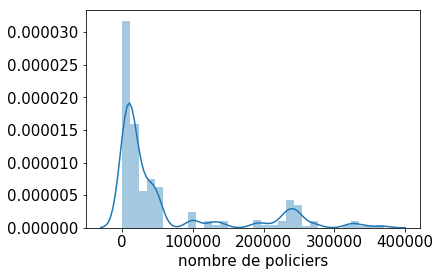

In [12]:
import seaborn as sns
sns.distplot(policier_infraction_propre["nombre de policiers"]) #normalization a faire puis distribution non normale. 

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


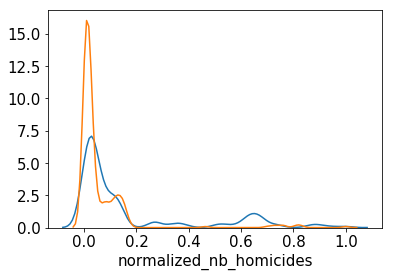

In [13]:
policier_infraction_propre["normalized_nb_policiers"]=(policier_infraction_propre["nombre de policiers"]-policier_infraction_propre["nombre de policiers"].min())/(policier_infraction_propre["nombre de policiers"].max()-policier_infraction_propre["nombre de policiers"].min())
sns.distplot(policier_infraction_propre["normalized_nb_policiers"], hist=False)
policier_infraction_propre["normalized_nb_homicides"]=(policier_infraction["nombre d'homicides"]-policier_infraction_propre["nombre d'homicides"].min())/(policier_infraction_propre["nombre d'homicides"].max()-policier_infraction_propre["nombre d'homicides"].min())
sns.distplot(policier_infraction_propre["normalized_nb_homicides"], hist=False) 

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


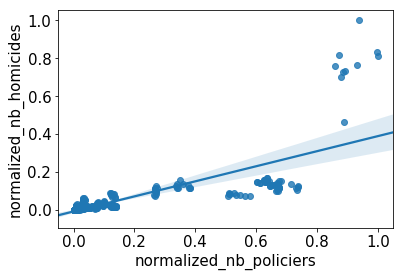

In [14]:
ax = sns.regplot(x="normalized_nb_policiers", y="normalized_nb_homicides", data=policier_infraction_propre) 
# On observe une forte correlation entre le nombre d'homicides et le nombre de policiers.
#Cependant pour un fort nombre de policiers, celle_ci diminue. Cela devrait être le contraire. Valeurs à exclure ?

In [15]:
policier_infraction_propre.corr(method='pearson') #corellation de 0.75 par la méthode de pearson


,TIME,nombre d'homicides,nombre de policiers,normalized_nb_policiers,normalized_nb_homicides
TIME,1.000000,-0.055029,-0.010074,-0.010074,-0.055029
nombre d'homicides,-0.055029,1.000000,0.750468,0.750468,1.000000
nombre de policiers,-0.010074,0.750468,1.000000,1.000000,0.750468
normalized_nb_policiers,-0.010074,0.750468,1.000000,1.000000,0.750468
normalized_nb_homicides,-0.055029,1.000000,0.750468,0.750468,1.000000


In [16]:

policier_infraction = police.merge(infraction, left_on=['GEO',"TIME"], right_on=['GEO',"TIME"], how='outer') 

policier_infraction_detenus = policier_infraction.merge(detenus, left_on=['GEO',"TIME"], right_on=['GEO',"TIME"], how='outer') 


policier_infraction_detenus = policier_infraction_detenus.drop(columns=['UNIT_x', 'Flag and Footnotes_x',"UNIT_y","Flag and Footnotes_y",'UNIT',"Flag and Footnotes"])

policier_infraction_detenus = policier_infraction_detenus.dropna(axis=0)
policier_infraction_detenus = policier_infraction_detenus[policier_infraction_detenus.ICCS == "Homicide intentionnel"]

policier_infraction_detenus = policier_infraction_detenus.rename(columns={"Value_x": "nombre de policiers"})
policier_infraction_detenus = policier_infraction_detenus.rename(columns={"Value_y": "Homicide intentionnel"})
policier_infraction_detenus = policier_infraction_detenus.rename(columns={"Value": "nombre de détenus"})



#policier_infraction_detenus = policier_infraction_detenus[policier_infraction_detenus["nombre de policiers"] != ":"]

#policier_infraction_detenus = policier_infraction_detenus[policier_infraction_detenus["nombre de détenus"] != ":"]

#policier_infraction_detenus["nombre de policiers"] = policier_infraction_detenus["nombre de policiers"].astype(int)
policier_infraction_detenus["nombre de détenus"] = policier_infraction_detenus["nombre de détenus"].astype(int)


policier_infraction_detenus = policier_infraction_detenus.groupby(['TIME',"GEO"]).agg({"Homicide intentionnel" : "sum", "nombre de policiers" : "max", "nombre de détenus" : "sum"})
#ligne de code non obligatoire

policier_infraction_detenus = policier_infraction_detenus.reset_index()

policier_infraction_detenus.head(20)




,TIME,GEO,Homicide intentionnel,nombre de policiers,nombre de détenus
0,1998,"Allemagne (jusqu'en 1990, ancien territoire de...",998.0,237786.0,69917
1,1998,Autriche,77.0,26817.0,6891
2,1998,Chypre,7.0,3987.0,226
3,1998,Danemark,60.0,9962.0,3422
4,1998,England et Wales,750.0,126814.0,65771
5,1998,Estonie,196.0,4089.0,4791
6,1998,Finlande,113.0,7889.0,2772
7,1998,France,961.0,223582.0,53667
8,1998,Grèce,176.0,45389.0,7129
9,1998,Hongrie,289.0,30382.0,14366


C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


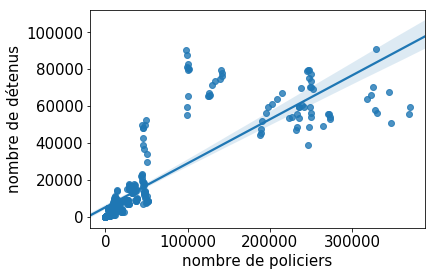

In [17]:
ax = sns.regplot(x="nombre de policiers", y="nombre de détenus", data=policier_infraction_detenus)
#Belle corrélation entre le nombre de policiers et le nombre de détenus

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


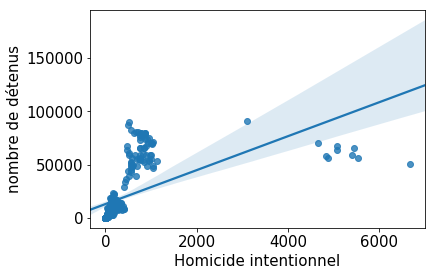

In [18]:
ax = sns.regplot(x="Homicide intentionnel", y="nombre de détenus", data=policier_infraction_detenus)
#clairement des couples de valeurs à l'écart qui ne permettent pas d'apprécier la relation. A drop ?

In [19]:
depenses_sante = pd.read_csv('protec_sociale.csv', sep = ",", decimal=",")

depenses_sante_infraction = depenses_sante.merge(infraction, left_on=['GEO',"TIME"], right_on=['GEO',"TIME"], how='inner')



depenses_sante_infraction = depenses_sante_infraction[depenses_sante_infraction.ICCS == "Homicide intentionnel"]
depenses_sante_infraction = depenses_sante_infraction[depenses_sante_infraction.UNIT_x == "Millions d'euros"]
depenses_sante_infraction = depenses_sante_infraction[depenses_sante_infraction.SPDEPS == "Total des dépenses"]

depenses_sante_infraction = depenses_sante_infraction.rename(columns={"Value_x": "depenses de sante"})
depenses_sante_infraction = depenses_sante_infraction.rename(columns={"Value_y": "Homicide intentionnel"})


depenses_sante_infraction = depenses_sante_infraction[depenses_sante_infraction["depenses de sante"] != ":"]


depenses_sante_infraction["depenses de sante"] = depenses_sante_infraction["depenses de sante"].replace(',', ".", regex=True)
                                   

depenses_sante_infraction["depenses de sante"] = pd.to_numeric(depenses_sante_infraction["depenses de sante"], errors='coerce')



depenses_sante_infraction.head(20)




,TIME,GEO,SPDEPS,UNIT_x,depenses de sante,Flag and Footnotes_x,UNIT_y,ICCS,Homicide intentionnel,Flag and Footnotes_y
1,2007,Belgique,Total des dépenses,Millions d'euros,90470.79,NaN,Nombre,Homicide intentionnel,211,NaN
126,2007,Bulgarie,Total des dépenses,Millions d'euros,4353.09,NaN,Nombre,Homicide intentionnel,169,NaN
251,2007,Tchéquie,Total des dépenses,Millions d'euros,24379.18,NaN,Nombre,Homicide intentionnel,126,NaN
376,2007,Danemark,Total des dépenses,Millions d'euros,67851.96,b,Nombre,Homicide intentionnel,76,NaN
501,2007,"Allemagne (jusqu'en 1990, ancien territoire de...",Total des dépenses,Millions d'euros,674738.90,NaN,Nombre,Homicide intentionnel,757,NaN
626,2007,Estonie,Total des dépenses,Millions d'euros,1945.87,NaN,Nombre,Homicide intentionnel,93,NaN
750,2007,Irlande,Total des dépenses,Millions d'euros,34743.28,NaN,Nombre,Homicide intentionnel,85,NaN
851,2007,Grèce,Total des dépenses,Millions d'euros,49477.06,p,Nombre,Homicide intentionnel,128,NaN
976,2007,Espagne,Total des dépenses,Millions d'euros,218969.36,NaN,Nombre,Homicide intentionnel,482,NaN
1101,2007,France,Total des dépenses,Millions d'euros,589811.62,NaN,Nombre,Homicide intentionnel,826,NaN


C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


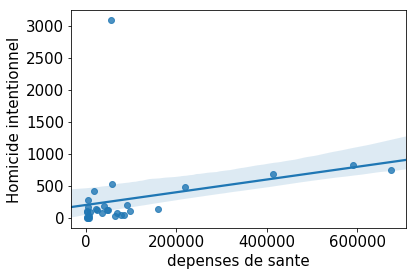

In [20]:
ax = sns.regplot(x="depenses de sante", y="Homicide intentionnel", data=depenses_sante_infraction)
#Très bonne correlation. Les dépenses en Santé doivent diminuer le nombre de morts. 

In [21]:
criminalite_densite = complet.merge(infraction, left_on=['GEO',"TIME"], right_on=['GEO',"TIME"], how='inner')

criminalite_densite
#Impossible à faire. Pas memes dates pour comparaison.


,GEO,Superficie_(km2),TIME,AGE,SEX,UNIT_x,nb_habitants,Flag and Footnotes_x,densite,UNIT_y,ICCS,Value,Flag and Footnotes_y


In [22]:
policier_infraction_detenus_sante =  policier_infraction_detenus.merge(depenses_sante_infraction, left_on=['GEO',"TIME", "Homicide intentionnel"], right_on=['GEO',"TIME", "Homicide intentionnel"], how='inner')

policier_infraction_detenus_sante.head(20)

,TIME,GEO,Homicide intentionnel,nombre de policiers,nombre de détenus,SPDEPS,UNIT_x,depenses de sante,Flag and Footnotes_x,UNIT_y,ICCS,Flag and Footnotes_y
0,2007,"Allemagne (jusqu'en 1990, ancien territoire de...",757.0,250353.0,73319,Total des dépenses,Millions d'euros,674738.90,NaN,Nombre,Homicide intentionnel,NaN
1,2007,Autriche,45.0,26623.0,8887,Total des dépenses,Millions d'euros,76713.21,NaN,Nombre,Homicide intentionnel,NaN
2,2007,Belgique,211.0,38718.0,9950,Total des dépenses,Millions d'euros,90470.79,NaN,Nombre,Homicide intentionnel,NaN
3,2007,Chypre,11.0,5139.0,646,Total des dépenses,Millions d'euros,2889.55,NaN,Nombre,Homicide intentionnel,NaN
4,2007,Danemark,76.0,10841.0,3646,Total des dépenses,Millions d'euros,67851.96,b,Nombre,Homicide intentionnel,NaN
5,2007,Espagne,482.0,214920.0,67100,Total des dépenses,Millions d'euros,218969.36,NaN,Nombre,Homicide intentionnel,NaN
6,2007,Estonie,93.0,3247.0,3466,Total des dépenses,Millions d'euros,1945.87,NaN,Nombre,Homicide intentionnel,NaN
7,2007,Finlande,128.0,8156.0,3370,Total des dépenses,Millions d'euros,45656.09,NaN,Nombre,Homicide intentionnel,NaN
8,2007,France,826.0,238478.0,60403,Total des dépenses,Millions d'euros,589811.62,NaN,Nombre,Homicide intentionnel,NaN
9,2007,Grèce,128.0,51152.0,11255,Total des dépenses,Millions d'euros,49477.06,p,Nombre,Homicide intentionnel,NaN


In [23]:
from sklearn.linear_model import LinearRegression



colonne = ["nombre de policiers", "depenses de sante", "nombre de détenus"]         #Attention à la dimension
X = policier_infraction_detenus_sante.loc[:,colonne]   

# 2. instantiate model
linreg = LinearRegression()

# 3. fit 
Y = policier_infraction_detenus_sante["Homicide intentionnel"]

linreg.fit(X, Y)
prediction = linreg.predict(X)
prediction

array([ 533.71995183,   69.55902138,  138.45727423,   63.55680914,
        -35.32493846, 1246.41261374,   46.30344873,   -8.61649424,
        637.81833064,  329.85529521,  178.34068902,   61.84610057,
         26.56463033, 1114.68951816,   82.6500295 ,  101.7905225 ,
         23.94586934,   41.36671247,  -56.60977775,  -49.23523229,
        601.97355404,  317.05255557,  372.14991459,  185.06065112,
         76.37981992,  -28.92694363,  -46.36690318,  316.25644899,
       2527.33052855])

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


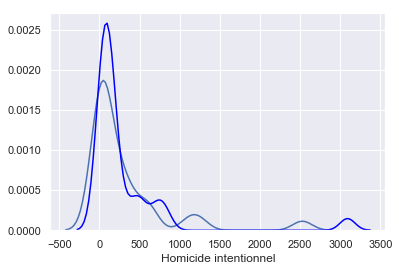

In [64]:
# différence distribution entre prédiction et réalité.
sns.set(color_codes=True)

b = linreg.intercept_
a = linreg.coef_

sns.distplot(prediction, hist=False)
sns.distplot(Y, color='blue', hist=False)

In [25]:
 linreg.score(X, Y)  #mesure le R2.

0.8490831992099136

In [28]:
#prediction_X = logreg.predict(X_X)
from sklearn.metrics import r2_score

r2_score(Y, prediction) #coef de determination

0.8490831992099136

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y,  prediction)   #erreur quadratique moyenne ou mean squared error (MSE)

49703.765356453005

In [29]:
r2_score(Y, prediction)/mean_squared_error(Y, prediction)

1.708287477056661e-05